#Kaggle Competition - Titanic - Machine Learning from Disaster (Top27%)

##Kaggle競賽 - 鐵達尼號生存預測 

## 環境

|環境|名稱|版本|
|-|-|-|
|作業系統|Windows|10|
|程式執行環境|Colab||
|python 版本|python3|3.10.2|
|安裝環境|pip|22.0.4|

## 安裝


```sh
pip install -r requirement.txt
```

In [ ]:
import time
import numpy as np
import pandas as pd

EXECUTION_START_TIME = time.time() # 計算執行時間

df = pd.read_csv('train.csv')      # 讀取資料

## 資料分析與前處理

### 導入所需要的module

In [ ]:
import random as rnd

# 導入資料視覺化 module
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 載入訓練資料和測試資料

In [ ]:
# 載入訓練資料
train=df
# 載入測試資料
test = pd.read_csv('test.csv')

In [ ]:
#去除不會用到的資訊(認為PassengerID，Ticket和Name並無法提供有用資訊)
train = train.drop(["PassengerId", "Ticket", "Name"], axis=1)
#保留測試資料的PassengerID
PassengerId = test["PassengerId"]
test = test.drop(["PassengerId", "Ticket", "Name"], axis=1)

### 檢查訓練資料集和測試資料集

In [ ]:
#查看訓練資料集
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
#查看測試資料集
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [ ]:
# 觀察資料是否有缺失值
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [ ]:
# 觀察資料分布
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


### 資料觀察&分析
將資料視覺化，透過圖表觀察train資料集的各項欄位和Survived是否有關連性，最後決定將與Survived有關連性的特徵(Sex,Pclass,Embarked,Family,Age,Fare等)作為輸入。

1-1.觀察性別(Sex)與生存率(Survived)的關係—女性生存率(0.74)遠高於男性(0.18)

In [ ]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


1-2.觀察性別(Sex)與生存率(Survived)的關係—女性生存率(0.74)遠高於男性(0.18)

資料視覺化，使用Seaborn繪製條形圖

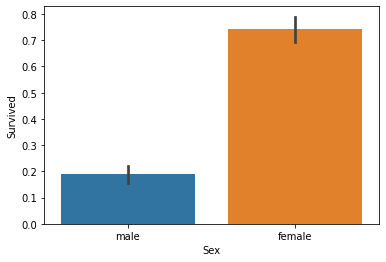

In [ ]:
sns.barplot(x='Sex', y='Survived', data=train)                  

2-1.觀察船票等級(Pclass)與生存率(Survived)的關係—船票等級越高(1>2>3)，生存率越高(0.62>0.47>0.24)

In [ ]:

train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


2-2.觀察船票等級(Pclass)與生存率(Survived)的關係—船票等級越高(1>2>3)，生存率越高(0.62>0.47>0.24)

資料視覺化，使用Seaborn繪製條形圖

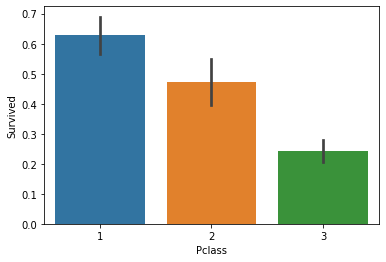

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train)                 

3-1.觀察上船港口(Embarked)與生存率(Survived)的關係—在C港(Cherbourg)上船的乘客生存率最高(0.55);而在S港(Southampton)上船的生存率最低(0.33)

In [ ]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


3-2.觀察上船港口(Embarked)與船票等級(Pclass)的關係

—在C港上船的乘客購買最高等級船票(Pclass=1)的比例較高，因此生存率較高

—在S港上船的乘客購買最低等級船票(Pclass=3)的比例較高，因此生存率較低

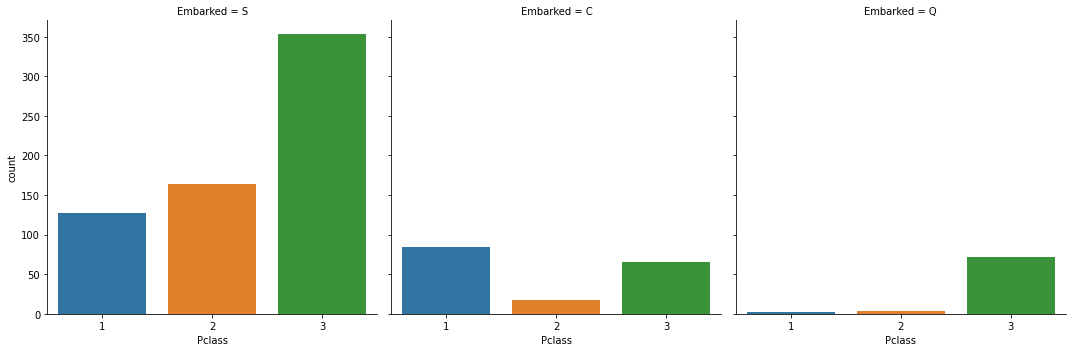

In [ ]:
sns.catplot(x='Pclass', col='Embarked', data=train,kind='count')

4-1.觀察與乘客同行的同輩(手足&配偶)數量(SibSp)與生存率(Survived)的關係—當與乘客同行的同輩數量為1人時，生存率最高(0.53)，其次為2人(0.46)、0人(0.34)

In [ ]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


4-2.觀察與乘客同行的同輩(手足&配偶)數量(SibSp)與生存率(Survived)的關係—當與乘客同行的同輩數量為1人時，生存率最高(0.53)，其次為2人(0.46)、0人(0.34)

資料視覺化，使用Seaborn繪製條形圖

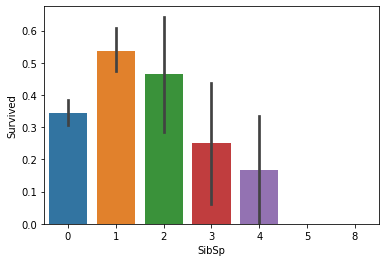

In [ ]:
sns.barplot(x='SibSp', y='Survived', data=train)                 

5-1.觀察與乘客同行的父母&子女數量(Parch)與生存率(Survived)的關係—當與乘客同行的父母&子女數量為3人時，生存率最高(0.60)，其次為1人(0.55)、2人(0.50)



In [ ]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


5-2.觀察與乘客同行的父母&子女數量(Parch)與生存率(Survived)的關係—當與乘客同行的父母&子女數量為3人時，生存率最高(0.60)，其次為1人(0.55)、2人(0.50)

資料視覺化，使用Seaborn繪製條形圖

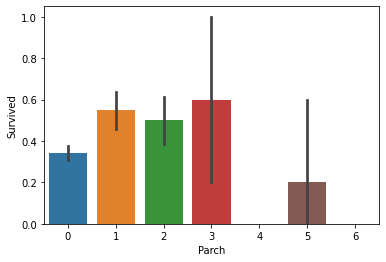

In [ ]:
sns.barplot(x='Parch', y='Survived', data=train)                 

6-1.觀察家庭人數(Family=Parch+SibSp)與生存率(Survived)的關係—當家庭人數為4人時，生存率最高(0.72)，其次為3人(0.57)、2人(0.55)

In [ ]:
train['Family']=train['Parch']+train['SibSp']+1
train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


6-2.觀察家庭人數(Family=Parch+SibSp)與生存率(Survived)的關係—當家庭人數為4人時，生存率最高(0.72)，其次為3人(0.57)、2人(0.55)

資料視覺化，使用Seaborn繪製條形圖

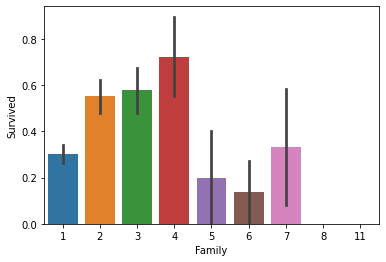

In [ ]:
sns.barplot(data=train,x='Family',y='Survived')               

7.觀察年齡(Age)與生存率(Survived)的關係—年齡小的乘客生存率較高

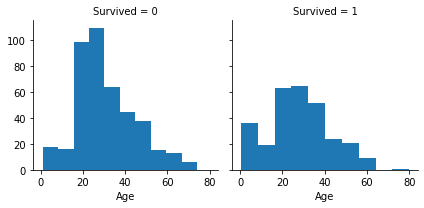

In [ ]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age')

7.觀察票價(Fare)與生存率(Survived)的關係—票價高時生存率較高

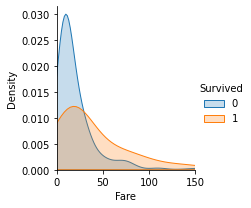

In [ ]:
g =sns.FacetGrid(train,hue='Survived')
g.map(sns.kdeplot,'Fare',shade=True)
g.set(xlim=(0,150))
g.add_legend()

### 載入資料前處理所需的module

將非數值的資料轉換成數值

In [ ]:
from sklearn import preprocessing

### 資料前處理

計算缺失值(missingvalues)的數量

In [ ]:
print('train :', end = "\n")
print(train.isnull().sum())
print()
print('test :', end = "\n")
print(test.isnull().sum())

train :
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Family        0
dtype: int64

test :
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64


將非數值的資料數值化以便後續查看關聯度

In [ ]:
le = preprocessing.LabelEncoder()
train_le = train.copy()

non_numeric_cols = ["Sex", "Cabin", "Embarked"]
for col in non_numeric_cols:
    train_le[col] = le.fit_transform(train[col])

In [ ]:
train_le.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,3,1,22.0,1,0,7.2500,147,2,2
1,1,1,0,38.0,1,0,71.2833,81,0,2
2,1,3,0,26.0,0,0,7.9250,147,2,1
3,1,1,0,35.0,1,0,53.1000,55,2,2
4,0,3,1,35.0,0,0,8.0500,147,2,1


處理Embarked欄位中的缺失值

觀察Embarked欄位中數值分布的情況，可以發現在S港上船的人數最多(可能性最大)，因此選擇使用S港來填補Embarked欄位中的缺失值

In [ ]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

處理Age欄位中的缺失值(1)

觀察熱力圖可以發現:

1. Pclass與Age/Survived的相關係數較大，因此選擇使用Pclass將乘客分組，並以每組的年齡平均值來填補Age欄位中的缺失值

2. Fare與Cabin/Placss 的相關係數較大，因此選擇使用Pclass將乘客分組(cabin缺失值過多)，並以每組的年齡平均值來填補Fare欄位中的缺失值

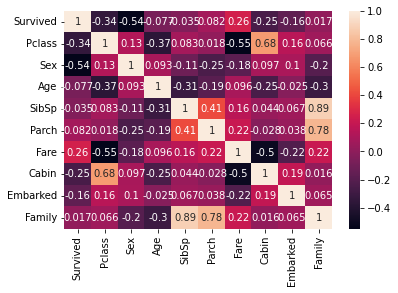

In [ ]:
plt.figure()
sns.heatmap(train_le.corr(),annot=True)
plt.show()

處理Age欄位中的缺失值(2)

2.觀察Age,Pclass與Sex的關係圖，可以發現隨著Pclass等級提升，男性和女性的年齡層都有提升的趨勢，而男性平均年齡相較於女性較高

選擇使用Sex作為第二個分組的組別來填補Age欄位中的缺失值

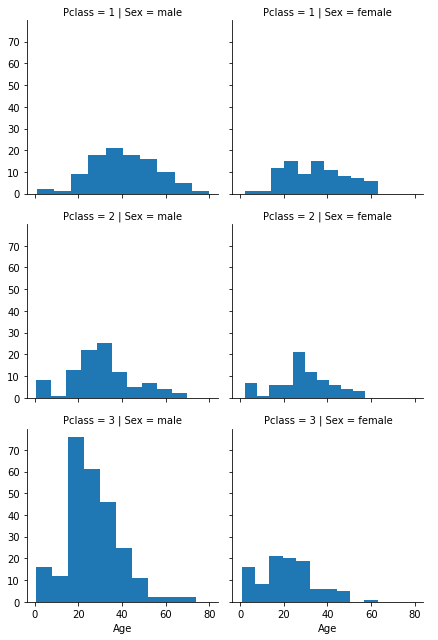

In [ ]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex')
grid.map(plt.hist, 'Age')
grid.add_legend()

In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,NaN,S,2
1,1,1,female,38.0,1,0,71.2833,C85,C,2
2,1,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,1,female,35.0,1,0,53.1000,C123,S,2
4,0,3,male,35.0,0,0,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,1
887,1,1,female,19.0,0,0,30.0000,B42,S,1
888,0,3,female,NaN,1,2,23.4500,NaN,S,4
889,1,1,male,26.0,0,0,30.0000,C148,C,1


清潔資料:

1.Cabin 缺失值過多，因此捨棄不用

2.填補Embarked欄位中的缺失值(以次數最多的"S"填補)

3.填補Age欄位中的缺失值(用Pclass和Sex將乘客分組，並以每組的年齡平均值來填補Age欄位中的缺失值)

4.填補Fare欄位中的缺失值(以Pclass分類平均值填補)

5.將類別資料(Sex)轉換為數值(male=0,female=1)

6.將類別資料(Embarked)轉換為數值(S=0,C=1,Q=2)
    

In [ ]:
def Data_aftercleaning(data):

    data = data.drop(columns="Cabin")
    
    data['Embarked'].fillna('S', inplace=True)

    data['Age'] = data.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
    
    data['Fare'] = data.groupby(['Pclass'])['Fare'].transform(lambda x: x.fillna(x.mean()))
    
    Sex_mapping = {'male':0, 'female':1}
    data['Sex'] = data.Sex.map(Sex_mapping)
    
    Embarked_mapping = {'S':0, 'C':1, 'Q':2}
    data['Embarked'] = data.Embarked.map(Embarked_mapping)

    return data

清潔訓練資料&檢查訓練資料

In [ ]:
train = Data_aftercleaning(train)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,0,22.0,1,0,7.2500,0,2
1,1,1,1,38.0,1,0,71.2833,1,2
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,0,35.0,0,0,8.0500,0,1


In [ ]:
X_train = pd.get_dummies(train.drop('Survived', axis=1))
y_train = train['Survived']

drop掉"Family"(測試後發現不是很優)

In [ ]:
X_train.drop(columns = "Family", inplace=True)

## 模型訓練

### 導入要使用的模型module

In [ ]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier #邏輯回歸　#感知器　#　梯度下降
from sklearn.svm import SVC, LinearSVC #支援向量機　#線性支援向量機
from sklearn.ensemble import RandomForestClassifier # 隨機森林
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB # 貝氏分類器
from sklearn.tree import DecisionTreeClassifier # 決策樹模型

from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score

### 用k-fold進行驗證

In [ ]:
# K-fold挑選模型
random_seed = 1012

kf = KFold(n_splits=5,         # 設定 K 值，資料集分成５份
           random_state=random_seed, # 控制隨機亂數
           shuffle=True)  #將資料集重新排序

#初始化要使用的model，同時設定超參數
model_dict = {"LogisticRegression":LogisticRegression(max_iter =10000,random_state=random_seed),
              "Perceptron":Perceptron(random_state=random_seed),
              "SGD":SGDClassifier(random_state=random_seed),
              "SVM":SVC(random_state=random_seed),
              "LinearSVC":LinearSVC(random_state=random_seed),
              "RandomForest":RandomForestClassifier(n_estimators=100,random_state=random_seed), #森林中有100棵樹，讓預測能力提升
              "KNN":KNeighborsClassifier(5), #抓出最鄰近的5個點
              "GNB":GaussianNB(),
              "DecisionTree":DecisionTreeClassifier(random_state=random_seed)}


avg_acc_dict = {}                                         #儲存每一個模型的平均準確度
for model_name, model in model_dict.items():
    print(f"開始訓練{model_name}")
    print()
    train_acc_list = []                                   # 儲存每次訓練模型的準確度
    valid_acc_list = []                                   # 儲存每次驗證模型的準確度
    for train_index, valid_index in kf.split(X_train):
    
        train_x_split = X_train.iloc[train_index]         # 產生訓練資料
        train_y_split = y_train.iloc[train_index]         # 產生訓練資料標籤
        valid_x_split = X_train.iloc[valid_index]         # 產生驗證資料
        valid_y_split = y_train.iloc[valid_index]         # 產生驗證資料標籤
    

        model.fit(train_x_split, train_y_split)
        train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
        train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                           train_pred_y)
        valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
        valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                           valid_pred_y)

        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)
    print(f'========={model_name}=========')
    print(f'average train accuracy: {np.mean(train_acc_list)}')  # 輸出平均訓練準確度
    print(f'min train accuracy: {np.min(train_acc_list)}')   # 輸出最低訓練準確度
    print(f'max train accuracy: {np.max(train_acc_list)}')   # 輸出最高訓練準確度
    print(f'average valid accuracy: {np.mean(valid_acc_list)}')   # 輸出平均驗證準確度
    print(f'min valid accuracy: {np.min(valid_acc_list)}')    # 輸出最低驗證準確度
    print(f'max valid accuracy: {np.max(valid_acc_list)}')  # 輸出最高驗證準確度
            
    print()
    #將每個模型的平均準確度存入字典
    avg_acc_dict[model_name] = np.mean(train_acc_list)

開始訓練LogisticRegression

=========LogisticRegression=========
average train accuracy: 0.8122941519454118
min train accuracy: 0.8008415147265077
max train accuracy: 0.8286516853932584
average valid accuracy: 0.8081036971941498
min valid accuracy: 0.7808988764044944
max valid accuracy: 0.8370786516853933

開始訓練Perceptron

=========Perceptron=========
average train accuracy: 0.7107375860819137
min train accuracy: 0.6002805049088359
max train accuracy: 0.7794943820224719
average valid accuracy: 0.7115309773397779
min valid accuracy: 0.6404494382022472
max valid accuracy: 0.7921348314606742

開始訓練SGD

=========SGD=========
average train accuracy: 0.7516924846746615
min train accuracy: 0.6633941093969145
max train accuracy: 0.7837078651685393
average valid accuracy: 0.75868432615655
min valid accuracy: 0.6910112359550562
max valid accuracy: 0.8146067415730337

開始訓練SVM

=========SVM=========
average train accuracy: 0.6835037899680099
min train accuracy: 0.6633941093969145
max train accuracy: 0.7

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


=========RandomForest=========
average train accuracy: 0.9845686843059079
min train accuracy: 0.9789621318373072
max train accuracy: 0.9901823281907434
average valid accuracy: 0.8024982738057874
min valid accuracy: 0.7752808988764045
max valid accuracy: 0.848314606741573

開始訓練KNN

=========KNN=========
average train accuracy: 0.7954579479017287
min train accuracy: 0.7755960729312763
max train accuracy: 0.8075842696629213
average valid accuracy: 0.7037662419182726
min valid accuracy: 0.6480446927374302
max valid accuracy: 0.7528089887640449

開始訓練GNB

=========GNB=========
average train accuracy: 0.7943319885906991
min train accuracy: 0.7896213183730715
max train accuracy: 0.8008415147265077
average valid accuracy: 0.7878727010231624
min valid accuracy: 0.7415730337078652
max valid accuracy: 0.8258426966292135

開始訓練DecisionTree

=========DecisionTree=========
average train accuracy: 0.9848491892147437
min train accuracy: 0.9789621318373072
max train accuracy: 0.9915848527349228
average v

In [ ]:
#每個模型的平均準確度
avg_acc_dict

{'DecisionTree': 0.9848491892147437,
 'GNB': 0.7943319885906991,
 'KNN': 0.7954579479017287,
 'LinearSVC': 0.6958562491135729,
 'LogisticRegression': 0.8122941519454118,
 'Perceptron': 0.7107375860819137,
 'RandomForest': 0.9845686843059079,
 'SGD': 0.7516924846746615,
 'SVM': 0.6835037899680099}

In [ ]:
#按照準確度高低排列
sorted(avg_acc_dict.items(), key=lambda x: x[1] ,reverse= True)

[('DecisionTree', 0.9848491892147437),
 ('RandomForest', 0.9845686843059079),
 ('LogisticRegression', 0.8122941519454118),
 ('KNN', 0.7954579479017287),
 ('GNB', 0.7943319885906991),
 ('SGD', 0.7516924846746615),
 ('Perceptron', 0.7107375860819137),
 ('LinearSVC', 0.6958562491135729),
 ('SVM', 0.6835037899680099)]

### 用完整的資料做訓練

In [ ]:
#清潔測試資料集
test = Data_aftercleaning(test)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.500000,0,0,7.8292,2
1,3,1,47.000000,1,0,7.0000,0
2,2,0,62.000000,0,0,9.6875,2
3,3,0,27.000000,0,0,8.6625,0
4,3,1,22.000000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,24.525104,0,0,8.0500,0
414,1,1,39.000000,0,0,108.9000,1
415,3,0,38.500000,0,0,7.2500,0
416,3,0,24.525104,0,0,8.0500,0


In [ ]:
#從k-fold選出了第一名模型 => 隨機森林

#模型初始化，設定超參數
model = RandomForestClassifier(n_estimators=100)
#模型訓練
model.fit(X_train, y_train)
#模型預測測試資料集
preds = model.predict(test)
#預測結果
preds

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 160.14842915534973


In [ ]:
#submission: index使用PassengerId，Column name使用Survived
submission = pd.DataFrame(preds,index=PassengerId,columns=["Survived"])
submission

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,1
...,...
1305,0
1306,1
1307,0


In [ ]:
#儲存成csv檔
submission.to_csv("my_submission.csv")

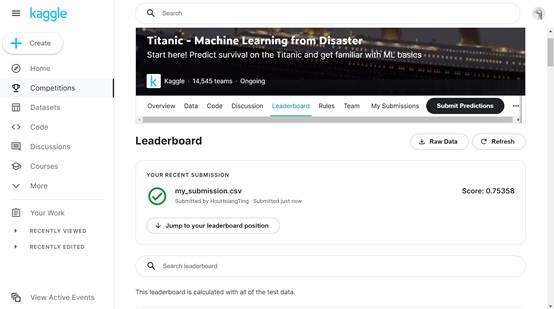

## 參考連結

1.https://reurl.cc/1Z7VyV

2.https://reurl.cc/an8YQZ

3.https://zhuanlan.zhihu.com/p/50194676

4.https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/notebook

5.https://www.kaggle.com/code/osemds/first-titanic-and-also-kaggle-attempt/notebook

6.https://www.kaggle.com/code/amirhosainmahdiani/titanic-dataset-prediction

7.https://reurl.cc/41vzE2

8.https://reurl.cc/RrEVar

9.https://yaojenkuo.io/ml-newbies/04-sklearn.html

10.https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

11.https://www.kaggle.com/code/yassineghouzam/titanic-top-4-with-ensemble-modeling

12.https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial

13.https://www.kaggle.com/code/arthurtok/introduction-to-ensembling-stacking-in-python

14.https://www.kaggle.com/code/sinakhorami/titanic-best-working-classifier/notebook
